<a href="https://colab.research.google.com/github/MuhammadShavaiz/Clothes-Generator/blob/main/pytorchworkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [15]:
x = torch.arange(0,5,0.2)
w = 0.5
b=0.1
y = b+w*x
print(x)
print(y)

tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 1.0000, 1.2000, 1.4000, 1.6000,
        1.8000, 2.0000, 2.2000, 2.4000, 2.6000, 2.8000, 3.0000, 3.2000, 3.4000,
        3.6000, 3.8000, 4.0000, 4.2000, 4.4000, 4.6000, 4.8000])
tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
        1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000, 1.8000,
        1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000])


In [16]:
X_train = x[:20]
X_test = x[20:]
y_train = y[:20]
y_test = y[20:]

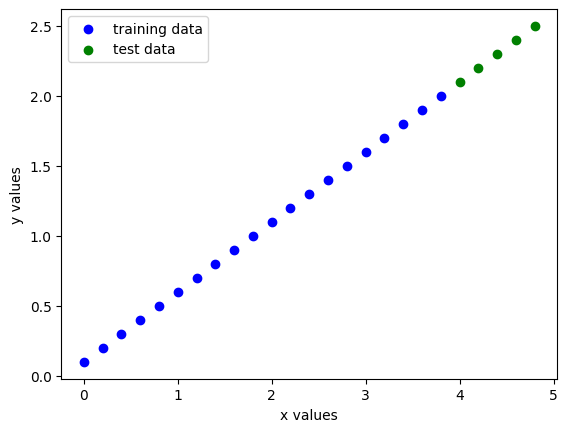

In [17]:
plt.scatter(X_train, y_train, c = 'b', label = "training data")
plt.scatter(X_test, y_test, c = 'g', label = "test data")
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()



In [18]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x:torch.Tensor) ->torch.Tensor:
    return self.weights*x + self.bias

In [19]:
model_0 = LinearRegressionModel()
list(model_0.parameters())
model_0.state_dict()


OrderedDict([('weights', tensor([-0.9907])), ('bias', tensor([0.3432]))])

In [20]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)


In [21]:
epochs = 200
epoch_list = []
loss_list = []
test_loss_list = []
for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)
    if epoch%10 == 0:
      epoch_list.append(epoch)
      loss_list.append(loss)
      test_loss_list.append(test_loss)
      print(f"Epoch: {epoch} loss: {loss} Test_Loss: {test_loss}")

Epoch: 0 loss: 2.613501787185669 Test_Loss: 6.223396301269531
Epoch: 10 loss: 2.1846871376037598 Test_Loss: 5.308676242828369
Epoch: 20 loss: 1.7672468423843384 Test_Loss: 4.401474952697754
Epoch: 30 loss: 1.3716490268707275 Test_Loss: 3.5163540840148926
Epoch: 40 loss: 1.002876877784729 Test_Loss: 2.6585936546325684
Epoch: 50 loss: 0.6825214624404907 Test_Loss: 1.8623535633087158
Epoch: 60 loss: 0.44108420610427856 Test_Loss: 1.1703535318374634
Epoch: 70 loss: 0.31313949823379517 Test_Loss: 0.6973133683204651
Epoch: 80 loss: 0.27164527773857117 Test_Loss: 0.4754334092140198
Epoch: 90 loss: 0.25292035937309265 Test_Loss: 0.4055933952331543
Epoch: 100 loss: 0.23685626685619354 Test_Loss: 0.37307313084602356
Epoch: 110 loss: 0.2206002175807953 Test_Loss: 0.3529927432537079
Epoch: 120 loss: 0.20453616976737976 Test_Loss: 0.3204725384712219
Epoch: 130 loss: 0.1882801502943039 Test_Loss: 0.30039215087890625
Epoch: 140 loss: 0.17221608757972717 Test_Loss: 0.2678719162940979
Epoch: 150 loss: 

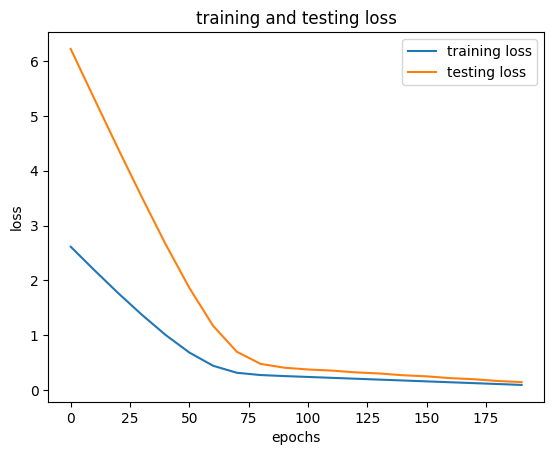

In [26]:
plt.plot(epoch_list, torch.tensor(loss_list).numpy(), label="training loss")
plt.plot(epoch_list, test_loss_list, label = "testing loss")
plt.title("training and testing loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [28]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_NAME = 'python_workflow_01.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [29]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.4327])), ('bias', tensor([0.2742]))])